# 决策树

## 类型
- 分类变量决策树
决策树具有分类目标变量，称为分类变量决策树。例:-在上述学生问题场景中，目标变量为学生是否会打板球，即是或否。    
- 连续变量决策树
决策树具有连续的目标变量，称为连续变量决策树。  

## 原理
决策树算法试图通过使用树表示来解决问题。 树的每个内部节点对应于属性，并且每个叶节点对应于类标签。  
1、将数据集的最佳属性放在树的根上。  
2、将训练集拆分为子集。 子集应该以这样的方式进行，即每个子集包含具有相同属性值的数据。  
3、在每个子集上重复步骤1和步骤2，直到在树的所有分支中找到叶子节点。  

在决策树中，为了预测记录的类标签，我们从树的根开始。   
我们将根属性的值与记录的属性进行比较。在比较的基础上，我们遵循与该值对应的分支并跳转到下一个节点。  
继续将记录的属性值与树的其他内部节点进行比较，直到我们到达具有预测类值的叶节点。   
建模的决策树可用于预测目标类别或值。

示例：
建立一个决策树来根据职业，产品和各种其他变量来预测客户收入。 在这种情况下，决策树预测连续变量的值。

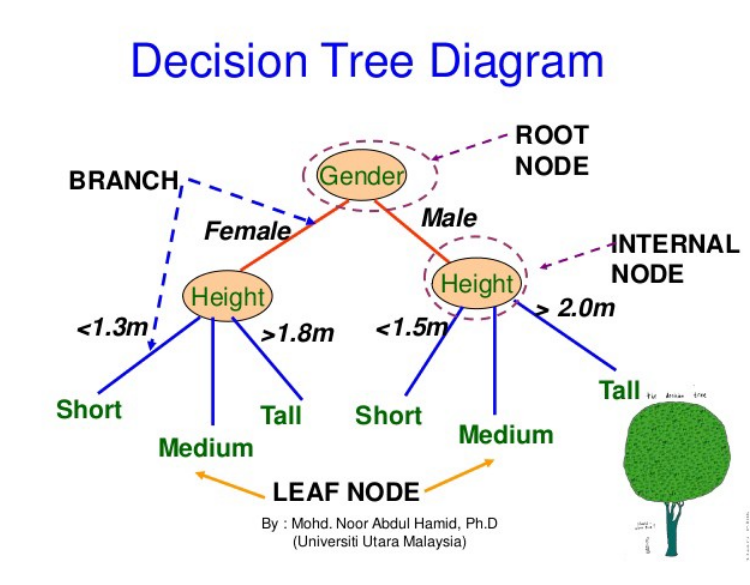

## 参数
- 节点拆分的最小样本数  
定义一个节点中需要考虑用于分割的最小样本数(或观测值)  
Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.  
用于控制过度拟合。 较高的值会阻止模型学习关系，这种关系可能对为树选择的特定样本高度特定。  
太高的值会导致欠拟合，因此应使用CV进行调整。

- 终端节点(叶子)的最小样本  
定义终端节点或叶子中所需的最小样本（或观察值）。  
用于控制过度拟合，类似于min_samples_split。  
一般来说，应该选择较低的值来解决不平衡的阶级问题，因为少数类别占多数的区域将非常小。  
Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.  

- 树的最大深度(垂直)  
用于控制过度拟合，因为更高的深度将允许模型学习针对一个特定样本的关系。  

- 叶子节点的最大数目 
可以定义代替max_depth。 由于创建了二叉树，因此深度'n'将产生最多2 ^ n个叶子。  

- 拆分时要考虑的最大特征数  
在搜索最佳拆分时要考虑的特性数量。这些是被随机选择的。  
作为一个拇指规则，总特征数的平方根工作得很好，但我们需要检查多达总特征数的30 - 40%。  
较高的值可能导致过度拟合，但这取决于具体情况。  

设置约束的技术是一种贪婪的方法。 换句话说，它将立即检查最佳分割并向前移动，直到达到指定的停止条件之一。  

## 算法选择
如果因变量和自变量之间的关系很好地近似于线性模型，线性回归将优于基于树的模型。  
如果因变量和自变量之间存在高度非线性和复杂的关系，那么树模型将优于经典的回归方法。  

## 工作过程
1、构建树  
2、从根节点的数据开始。  
3、选择一个属性并对属性制定一个逻辑测试。  
4、对测试的每个结果进行分支，并将满足该结果的样本子集移动到相应的子节点。  
5、在每个子节点上递归。(3,4)  
6、重复直到叶子是“纯净的”，即从单个类中得到样本，或“几乎纯粹”，即大多数样本来自同一类。  
7、修建树  
8、删除不能提高分类精度的子树。  
9、避免过度拟合，即训练集特定

## 构建树

评估所有属性的分裂点

·选择“最佳”点和“获胜”属性

·将数据拆分为两个

·宽度/深度优先构造

·关键步骤：

·制定良好的分裂测试

·属性的选择度量


*如何捕捉好属性的分裂点？*

·更喜欢拟合数据的最简单假设  
·最小消息/描述长度  

·数据集D.  
  假设H1，H2，...，Hx描述D  
  MML（Hi）= Mlength(Hi）+ Mlength（D|Hi）   
  用最少的MML选择Hk  

 Mlength是基尼指数，增益等给出的。

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [10]:
data = pd.read_csv('Iris.csv')
data.head()
data.drop('Id',axis=1,inplace=True)
data.head()
data.describe()
data = data.rename(columns={"species": "label"})
data.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
#print(repr(data[['label']]))
np.unique(data[['label']])
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False
check_purity(data)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

TypeError: '(slice(None, None, None), -1)' is an invalid key

In [ ]:
sub_tree = {question: [yes_answer, no_answer]}
example_tree = {"petal_width <= 0.8":["Iris-setosa",
                                     {"petal_width <= 1.65": ]}

# 随机森林

## 概要
信用卡公司使用随机森林建立了欺诈检测模型。 该模型可以基于大量特征将每个交易分类为有效或欺诈。 
如果在交易被归类为欺诈行为之后，分析师想知道模型为什么做出这个决定，即每个特征对最终结果有多大贡献，该怎么办？  
或者，如果在旧数据集上按预期工作的随机森林模型在新数据集上产生意外结果，该怎么办？   
如何检查哪些特征对预期行为的变化贡献最大。

森林由大量深树组成，每棵树都使用随机选择的特征对袋装数据进行训练，因此通过检查每棵树来充分了解决策过程是不可行的。  
此外，即使只检查一棵树，只有在它具有较小的深度和较少的特征的情况下才是可行的。   
深度为10的树已经可以拥有数千个节点，这意味着使用它作为解释模型几乎是不可能的。